Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Load the dataset

In [2]:
df = pd.read_csv("HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Delete numbers column

In [3]:
df = df.iloc[:, 1:]
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Display basic information about the dataset

In [4]:
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB
None


Find duplicate values

In [5]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


No of unique values in each column

In [6]:
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values in each column:
Category: 5
Age: 49
Sex: 2
ALB: 189
ALP: 414
ALT: 341
AST: 297
BIL: 188
CHE: 407
CHOL: 313
CREA: 117
GGT: 358
PROT: 198


Visualize unique counts

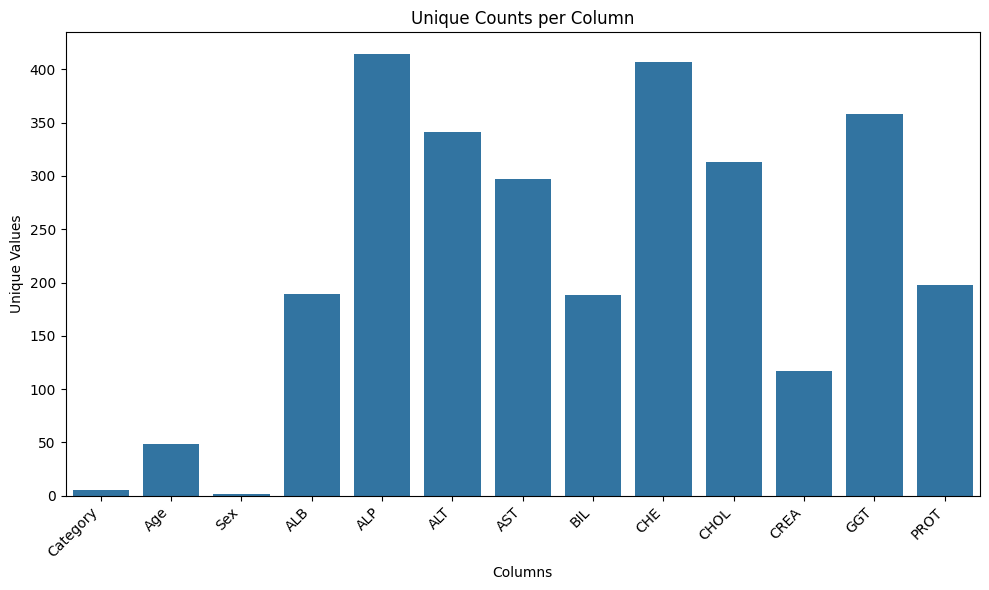

In [7]:
unique_counts = df.nunique()
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values)
plt.xticks(rotation=45, ha="right")
plt.title("Unique Counts per Column")
plt.ylabel("Unique Values")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

Find null values

In [8]:
print("Null values in each column:")
df.isnull().sum()

Null values in each column:


,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0
CHOL,10


Replace null values

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 5)
numeric_df = df.select_dtypes(include='float64')
imputed_df = imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_df ,columns=numeric_df.columns)
df[numeric_df.columns] = imputed_df
df.isna().sum()


,0
Category,0
Age,0
Sex,0
ALB,0
ALP,0
ALT,0
AST,0
BIL,0
CHE,0
CHOL,0


Check data types

In [10]:
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object


Filter the data

In [11]:
filtered_data = df[df["Category"] == "1=Hepatitis"]
print("\nFiltered data (Category = 1=Hepatitis):")
filtered_data.head()


Filtered data (Category = 1=Hepatitis):


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
540,1=Hepatitis,38,m,45.0,56.30,28.02,33.1,7.0,9.58,6.00,77.9,18.9,63.0
541,1=Hepatitis,19,m,41.0,64.22,87.00,67.0,12.0,7.55,3.90,62.0,65.0,75.0
542,1=Hepatitis,23,m,47.0,19.10,38.90,164.2,17.0,7.09,3.20,79.3,90.4,70.1
543,1=Hepatitis,25,m,42.0,38.20,63.30,187.7,14.0,6.00,4.28,66.9,40.2,70.5
544,1=Hepatitis,27,m,45.0,27.50,10.50,37.8,10.0,8.77,3.20,55.2,35.9,74.5


**Univariate Analysis**

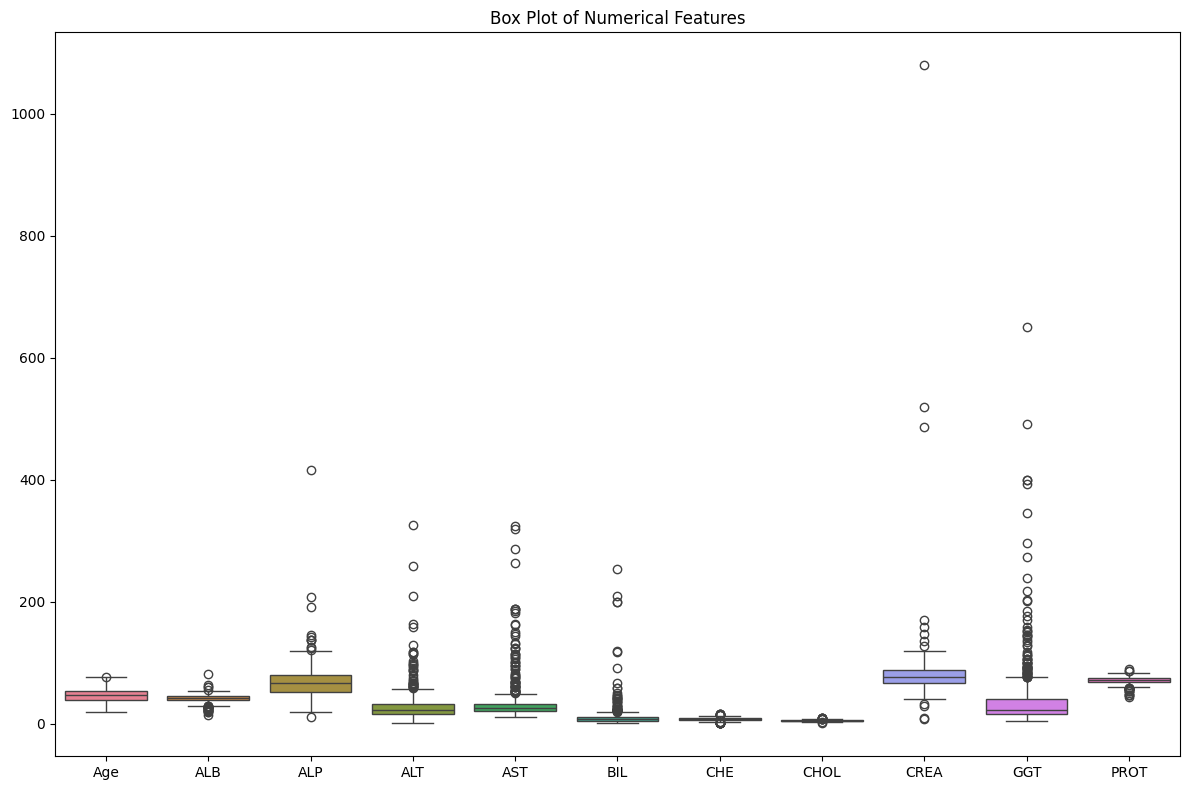

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Box Plot of Numerical Features")
plt.tight_layout()
plt.show()

In [13]:
import plotly.graph_objects as go
cat_count = df.Category.value_counts()
cat_percentage = (cat_count / cat_count.sum()) *100
print(cat_percentage)

labels = cat_percentage.index
values = cat_percentage.values
fig = go.Figure(data=[go.Pie(labels=labels , values=values , hole =.1)])
fig.update_layout(title = "Categories Percentages")
fig.show()

Category
0=Blood Donor             86.666667
3=Cirrhosis                4.878049
1=Hepatitis                3.902439
2=Fibrosis                 3.414634
0s=suspect Blood Donor     1.138211
Name: count, dtype: float64


In [14]:
import plotly.express as px
values = df.Sex.value_counts().values
labels = df.Sex.value_counts().index
px.bar(df,
       x=labels,
       y= values,
       color=labels,
       color_discrete_sequence=px.colors.qualitative.Pastel2,
       title= "Gender count",
       labels = {"x" : "Sex" , "y" : "Count"},
       )

In [15]:
from plotly.offline import iplot
iplot(px.histogram(
    df,
    x = "Age",
    title= "Age Distribution",
    color = "Age"
))

**Bivariate Analysis**

In [16]:
iplot(
    px.histogram(
        df,
        x = "Age",
        color = "Category",
        title= "Age Distribution by Category",
    )
)

In [17]:
for i, bio_mark in enumerate(df.select_dtypes(include='float64')):
    iplot(
        px.scatter(df,x= 'Age', y = bio_mark, color = "Age", title= f"{bio_mark} per Age"))

**Multivariate Analysis**

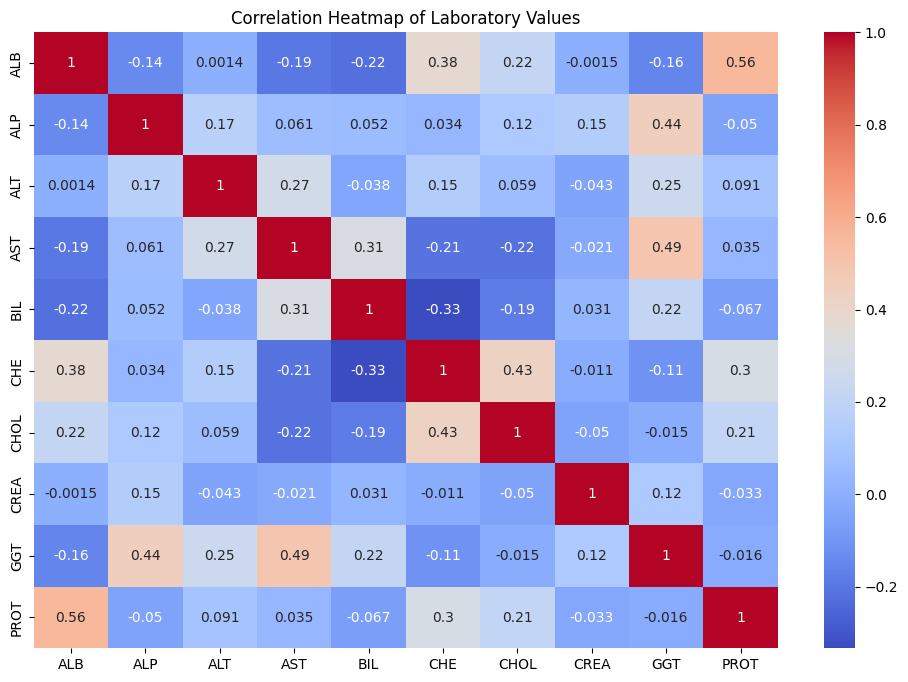

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Laboratory Values')
plt.show()

PCA Analysis

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_numeric = df.select_dtypes(include='float64')
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df_numeric)
pca = PCA()
pca_result = pca.fit_transform(df_scaled)
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, len(pca.explained_variance_ratio_) + 1)),
                         y=pca.explained_variance_ratio_,
                         mode='lines+markers',
                         name='Explained Variance Ratio'))

fig.update_layout(title='Explained Variance by Principal Components',
                  xaxis_title='Principal Component',
                  yaxis_title='Explained Variance Ratio',
                 )
fig.show()

**Random Forest Model**

Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

Label_pre = LabelEncoder()
data_cols=df.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)
df[label_col]= df[label_col].apply(lambda col:Label_pre.fit_transform(col))

In [21]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Splitting features and target

In [22]:
x = df.drop("Category", axis=1)
y = df["Category"]

In [23]:
x.shape,y.shape

((615, 12), (615,))

Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of testing data X_test:", X_test.shape)

Rows and columns of training data X_train: (492, 12)
Rows and columns of testing data X_test: (123, 12)


SMOTE to balance data

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

Class distribution after SMOTE:
Category
0    437
3    437
4    437
2    437
1    437
Name: count, dtype: int64


Model Creation

In [27]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

Evaluate the model

In [28]:
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        96
           1       1.00      0.67      0.80         3
           2       1.00      0.44      0.62         9
           3       0.40      0.33      0.36         6
           4       1.00      0.78      0.88         9

    accuracy                           0.90       123
   macro avg       0.86      0.64      0.72       123
weighted avg       0.90      0.90      0.89       123



Confusion Matrix:


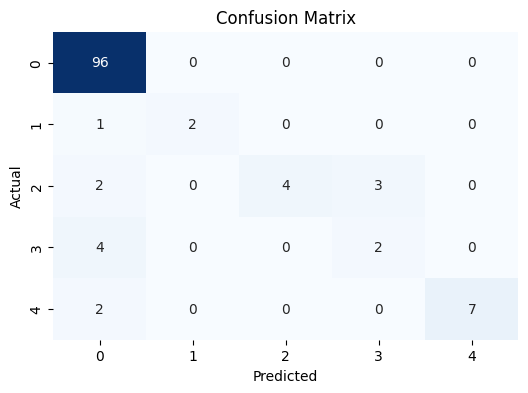

In [29]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Model Accuracy - 90%